# Online Payments Fraud Detection Machine Learning

In [2]:
# Load Libraries
import pandas as pd
import numpy as np


## Load Dataset

In [3]:
# Kaggle dataset Online Payments Fraud Detection
df = pd.read_csv("/content/onlinefraud.csv")


In [4]:
# Number of Rows and Columns
df.shape

(6362620, 11)

In [5]:
# Display first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# List Columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data Preparation

In [7]:
# Checking values for isFlaggedFraud
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [8]:
# Checking for nulls
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
# checking values for type
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


## Data Visualization

In [10]:
# Visualize Categories for Transaction Type
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
                values=quantity,
                names = transactions, hole=0.5,
                title = "Distribution of Transaction Type")
figure.show()

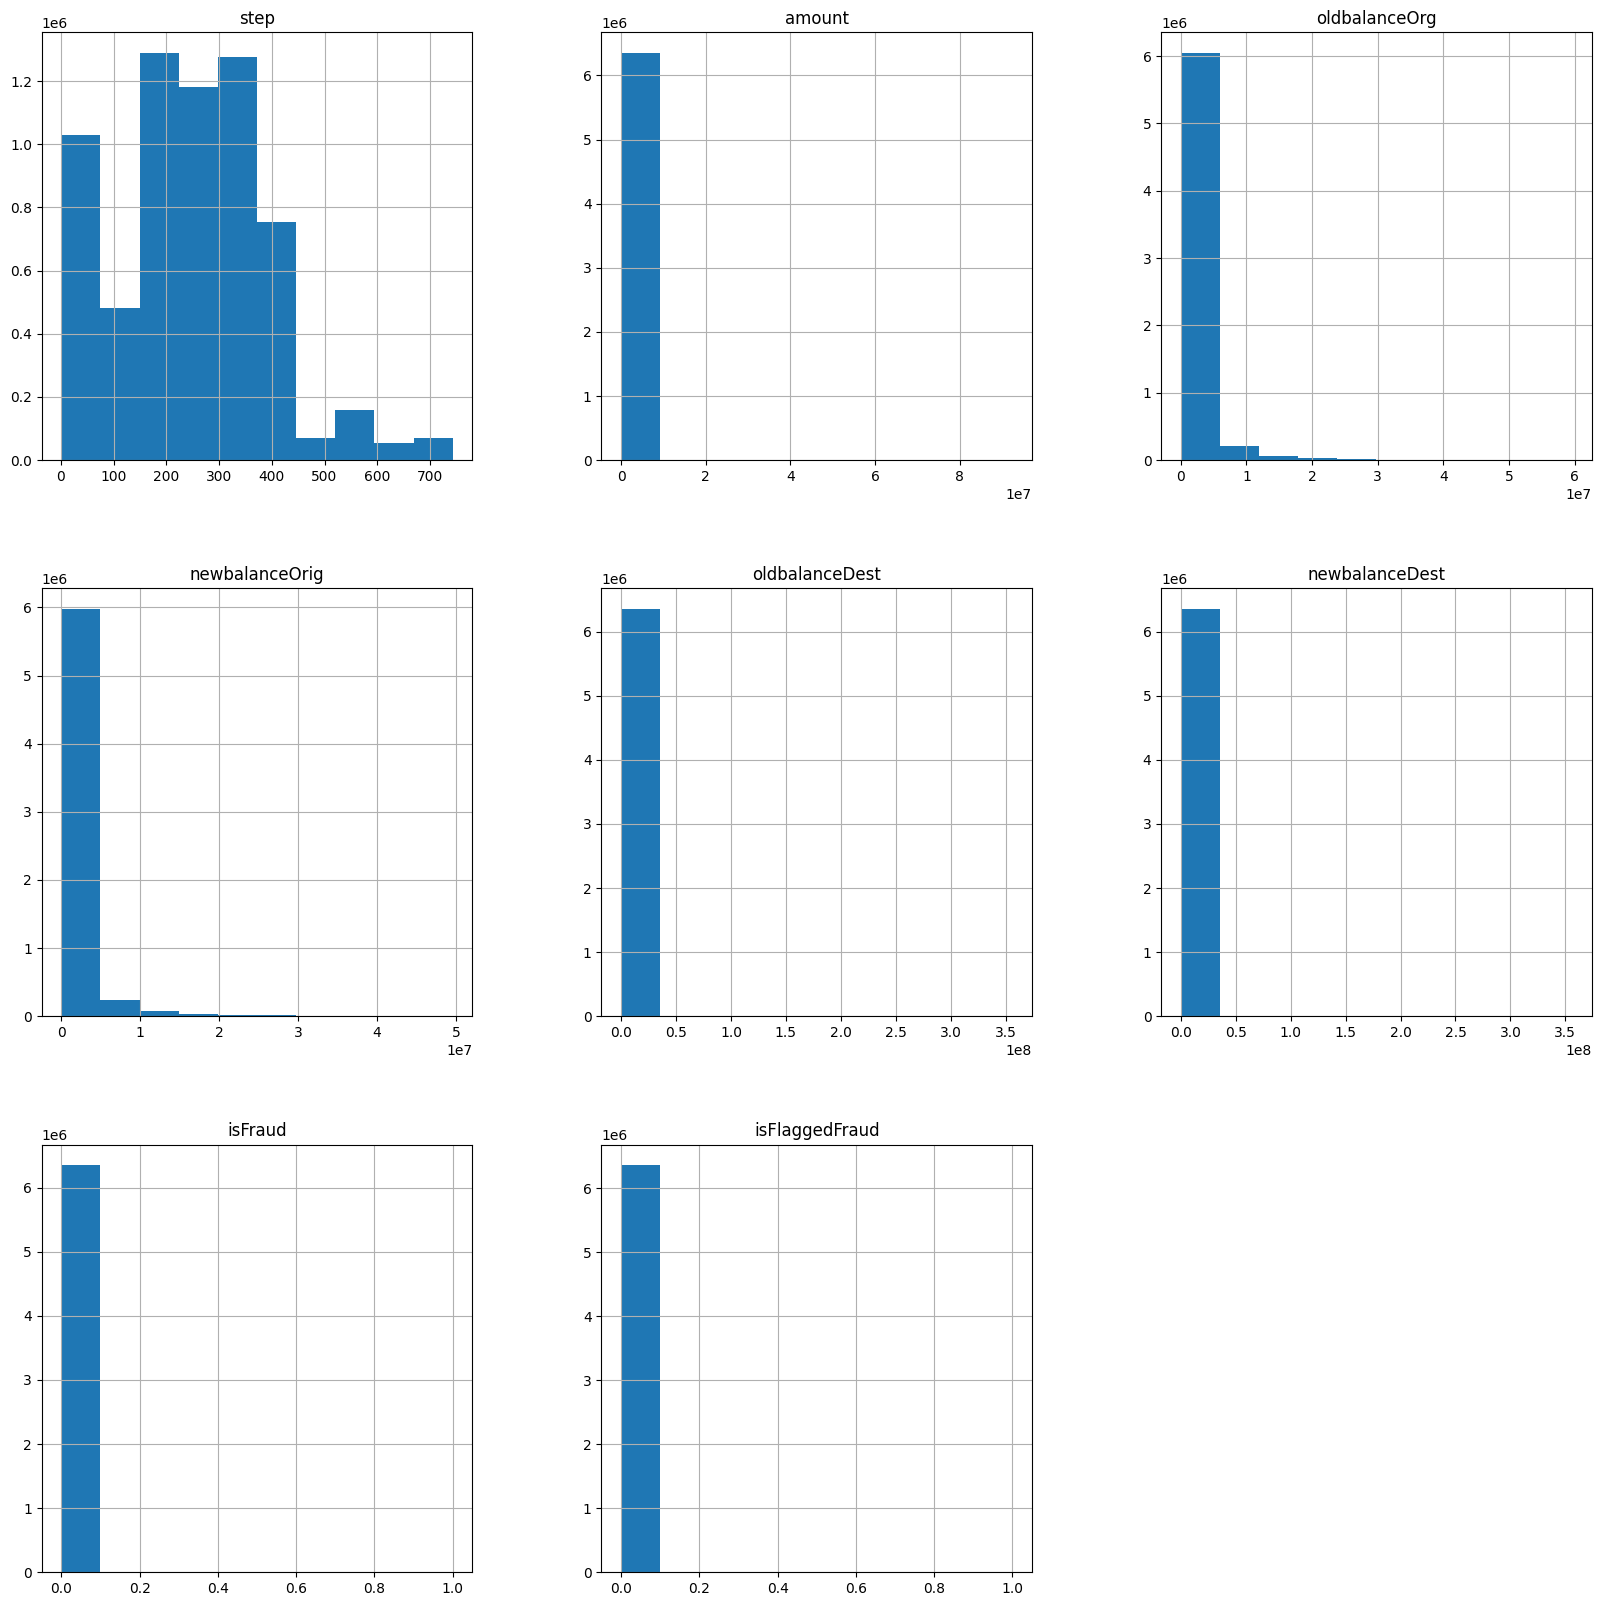

In [11]:
# Histogram for numeric values
import matplotlib.pyplot as plt
df.hist(figsize=(20,20))
plt.show()

In [12]:
# Correlation between features and target
correlation = df.corr(numeric_only=True)
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


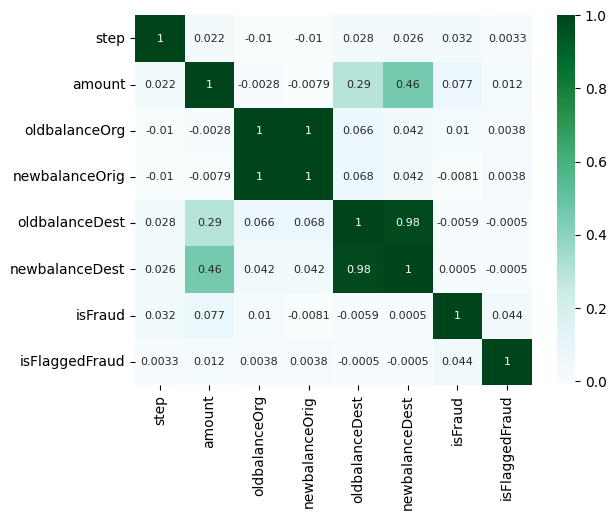

In [13]:
# Visualize Correlation
import seaborn as sns
sns.heatmap(round(df.corr(numeric_only=True),4), annot=True, cmap="BuGn",annot_kws={'size':8})
plt.show()

## Encoding and Correlation

In [14]:
# Encode categorical feature
df= pd.get_dummies(df,columns=['type'],prefix=['type'],dtype=int)

In [15]:
# Display rows after encoding
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [16]:
# Drop columns that are not needed
df = df.drop(["step","nameOrig", "nameDest", "oldbalanceDest", "newbalanceDest", "isFlaggedFraud"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   isFraud         int64  
 4   type_CASH_IN    int64  
 5   type_CASH_OUT   int64  
 6   type_DEBIT      int64  
 7   type_PAYMENT    int64  
 8   type_TRANSFER   int64  
dtypes: float64(3), int64(6)
memory usage: 436.9 MB


## Model Building

In [17]:
# Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Split Dataset into Features and Target

In [18]:
# Split in features (X) and target (y)
X = df.drop("isFraud",axis=1)

print(X.shape)


(6362620, 8)


In [19]:
y = df['isFraud']
print(y.shape)

(6362620,)


In [20]:
y.value_counts()

,count
isFraud,
0,6354407
1,8213


In [21]:
# Checking values for isFraud
df.tail(10)

,amount,oldbalanceOrg,newbalanceOrig,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6362610,63416.99,63416.99,0.0,1,0,0,0,0,1
6362611,63416.99,63416.99,0.0,1,0,1,0,0,0
6362612,1258818.82,1258818.82,0.0,1,0,0,0,0,1
6362613,1258818.82,1258818.82,0.0,1,0,1,0,0,0
6362614,339682.13,339682.13,0.0,1,0,0,0,0,1
6362615,339682.13,339682.13,0.0,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.0,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.0,1,0,1,0,0,0
6362618,850002.52,850002.52,0.0,1,0,0,0,0,1
6362619,850002.52,850002.52,0.0,1,0,1,0,0,0


### Imbalance

In [46]:
 # Address the imbalance between Fraud and Not Fraud
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(sampling_strategy=0.4)
X_ros,y_ros = ros.fit_resample(X,y)

In [28]:
 y_ros.value_counts()

,count
isFraud,
0,20532
1,8213


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20121, 8)
(8624, 8)
(20121,)
(8624,)


## Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
grid_params = {
'criterion': ['gini', 'entropy'],
'max_depth': [3,5,7,10],
'min_samples_split': range(2,10,1),
'min_samples_leaf': range(2,10,1)
}

grid_search = GridSearchCV(model, grid_params, cv=5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Score: 0.9926941950779792
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


### Model

In [38]:
# model
model  = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 2, min_samples_split= 3, random_state=42, class_weight='balanced')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)




### Accuracy

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6150
           1       0.97      1.00      0.98      2474

    accuracy                           0.99      8624
   macro avg       0.99      0.99      0.99      8624
weighted avg       0.99      0.99      0.99      8624



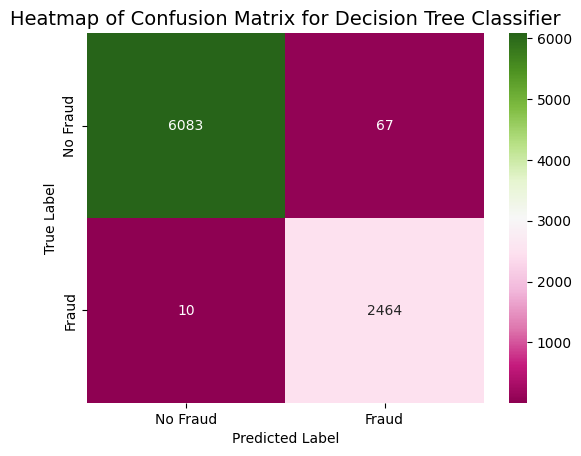

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for Random Forest")
print(classification_report(y_test, y_pred))
classes = ['No Fraud', 'Fraud']
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 14)
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

Model achieved 97% for detecting Fraud


## Predictions

In [48]:
X.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [52]:
data=[[63416.52,63416.52,0,0,0,0,0,1]]

p = pd.DataFrame(data,columns=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
p

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,63416.52,63416.52,0,0,0,0,0,1


In [53]:
if model.predict(p) == 0:
  print("Not Fraud")
else:
  print("Fraud")

Fraud


Results:
- The online payment data had an imbalance of 6 million rows (No Fraud) to 8213
rows (Fraud)
- Handled the imbalance by using RandomUnderSampling to reduce the No Fraud rows.No Fraud rows were reduced to 20532 rows.
- Used hyperparameter tuning to determine the best parameters for the Decision Tree model
- The Decision Tree model achieved 97% accuracy for detecting Fraud



